In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [7]:
corr = df.select_dtypes(include=np.number).corr()
corr.shape

(4, 4)

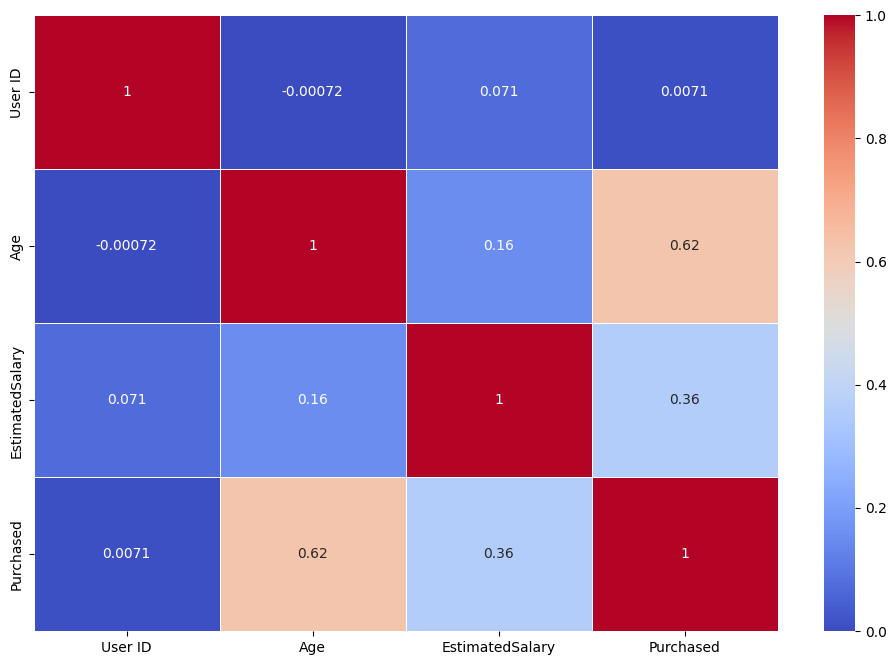

In [8]:
corr_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [9]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [10]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size =0.3,random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [14]:
y_pred = classifier.predict(xtest)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print(cm)

[[74  5]
 [11 30]]


In [16]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

In [17]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
error_rate = (FP + FN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)


In [18]:
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8666666666666667
Error Rate: 0.13333333333333333
Precision: 0.8571428571428571
Recall: 0.7317073170731707
